In [38]:
import numpy as np
import pandas as pd

from math import sqrt
import random
import os

#using this module for completing missing values
from sklearn.impute import SimpleImputer
#module for dealing with imbalanced data
from imblearn.over_sampling import SMOTE

#importing classification models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

#metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier

#data preprocessing
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [39]:
#Model definitions
r_forests = RandomForestClassifier(n_estimators=5, criterion='entropy')

d_tree = DecisionTreeClassifier(random_state=42)

logistic_r = LogisticRegression(penalty='l1', random_state=0)

svm = SVC(kernel='rbf', C=10, random_state=0, probability=True)

GBoosting = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=1, random_state=0)

bagging = BaggingClassifier(KNeighborsClassifier(),
                             max_samples=0.5, max_features=0.5)
models = [r_forests, d_tree, logistic_r, svm, bagging, GBoosting]

In [50]:
#loading data
data = pd.read_excel('../data/1year.xlsx')
data['B'] = (data['B'].index > 6755).astype(int)

data1 = pd.read_excel('../data/2year.xlsx')
data1['B'] = (data1['B'].index > 9772).astype(int)

data2 = pd.read_excel('../data/3year.xlsx')
data2['B'] = (data2['B'].index > 10007).astype(int)

data3 = pd.read_excel('../data/4year.xlsx')
data3['B'] = (data3['B'].index > 9276).astype(int)

data4 = pd.read_excel('../data/5year.xlsx')
data4['B'] = (data4['B'].index > 5499).astype(int)

In [51]:
#performing data preprocessing
def set_new_headers(df):
    cols = ['X' + str(i+1) for i in range(len(df.columns)-1)]
    cols.append('Y')
    df.columns = cols

imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
#new imputed data
mean_imputed_df = pd.DataFrame(imputer.fit_transform(data))
set_new_headers(mean_imputed_df)

mean_imputed_df1 = pd.DataFrame(imputer.fit_transform(data1))
set_new_headers(mean_imputed_df1)

mean_imputed_df2 = pd.DataFrame(imputer.fit_transform(data2))
set_new_headers(mean_imputed_df2)

mean_imputed_df3 = pd.DataFrame(imputer.fit_transform(data3))
set_new_headers(mean_imputed_df3)

mean_imputed_df4 = pd.DataFrame(imputer.fit_transform(data4))
set_new_headers(mean_imputed_df4)



In [42]:
mean_imputed_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Y
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0.0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0.0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0.0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0.0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0.0


In [47]:
#### main function to perform modelling
def perform_modelling(models, data_frame, year):
    results =pd.DataFrame(columns=["Year", "F1", "Accuracy", "Recalls", "Precision_score", "MAE", "MSE", "RMSE"])
    
    X = data_frame.iloc[:,:-1]
    Y = data_frame.iloc[:,-1]
    
    
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)
    
    smote = SMOTE(random_state=2)
    
    X_train_smoted, y_train_smoted = smote.fit_sample(X_train, y_train)
    
    
    for i in range(len(models)):
        clf = models[i]
        clf = clf.fit(X_train_smoted, y_train_smoted)
        
        y_test_predicted = clf.predict(X_test)
    
        f1=f1_score(y_test, y_test_predicted, average='weighted')
    
        acc = accuracy_score(y_test, y_test_predicted)
    
        recalls = recall_score(y_test, y_test_predicted)
    
        precisions = precision_score(y_test, y_test_predicted)
    
        mae = metrics.mean_absolute_error(y_test, y_test_predicted)
        
        mse = mean_squared_error(y_test, y_test_predicted)
        
        rms = sqrt(mse)
    
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
        
        res = [year, f1, acc, recalls, precisions, mae, mse, rms]
    
        results.loc[i] = res
    
        plt.clf()
    
        plt.plot(false_positive_rate, true_positive_rate)
    
        plt.xlabel('FPR')
        plt.ylabel('TPR')
    
        plt.title('ROC curve-' + year + '-' + str(clf))
    
        plt.show()
    
    results.index = ("RandomForestClassifier", "DecisionTreeClassifier", "LogisticRegression", "SVM", "BalancedBaggingClassifier","GradientBoostingClassifier")
    
    return results
    
    
    

# Year 1

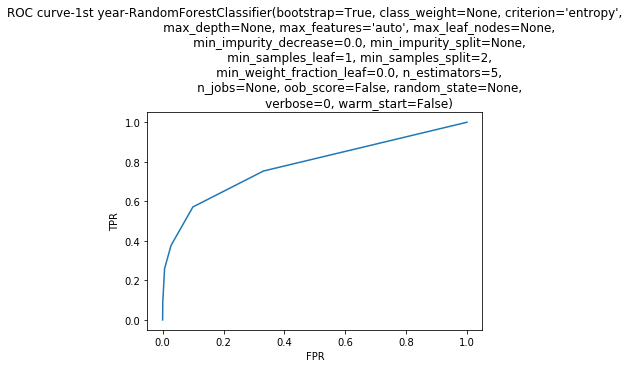

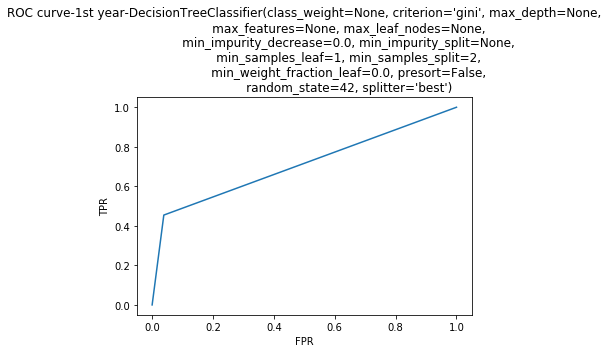

C:\Developement\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Developement\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


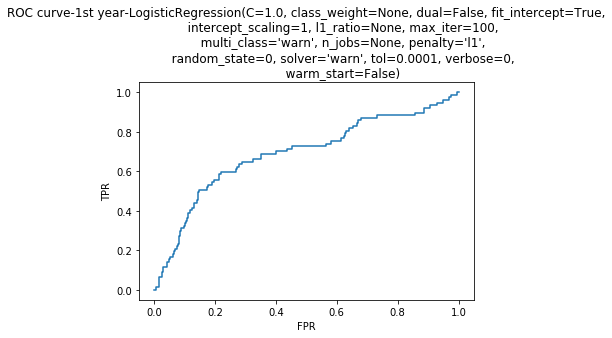

C:\Developement\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


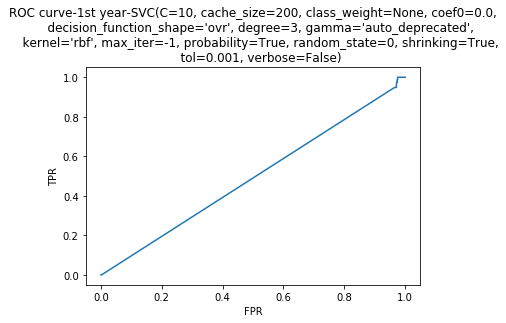

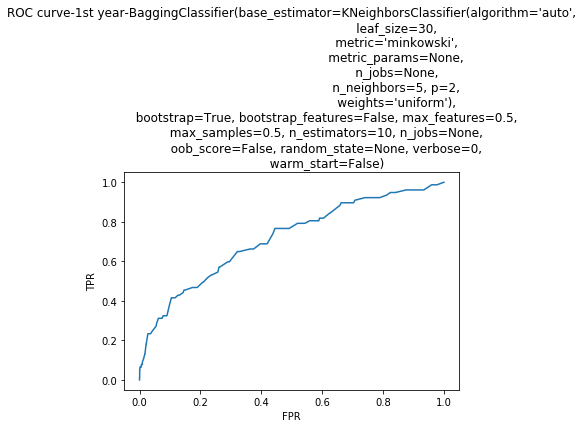

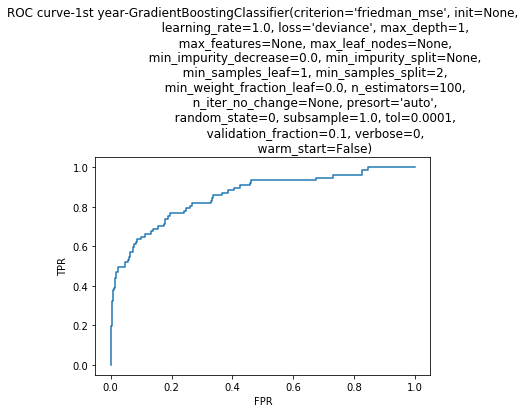

,Year,F1,Accuracy,Recalls,Precision_score,MAE,MSE,RMSE
RandomForestClassifier,1st year,0.951856,0.950688,0.376623,0.341176,0.049312,0.049312,0.222064
DecisionTreeClassifier,1st year,0.948237,0.943101,0.454545,0.309735,0.056899,0.056899,0.238535
LogisticRegression,1st year,0.761297,0.655287,0.662338,0.067819,0.344713,0.344713,0.587123
SVM,1st year,0.944863,0.962067,0.000000,0.000000,0.037933,0.037933,0.194763
BalancedBaggingClassifier,1st year,0.881660,0.835467,0.454545,0.102941,0.164533,0.164533,0.405627
GradientBoostingClassifier,1st year,0.951148,0.946420,0.493506,0.339286,0.053580,0.053580,0.231473


In [48]:
perform_modelling(models, mean_imputed_df, "1st year")

# Year 2

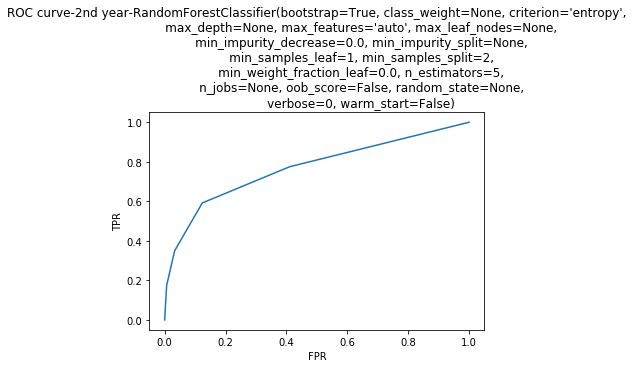

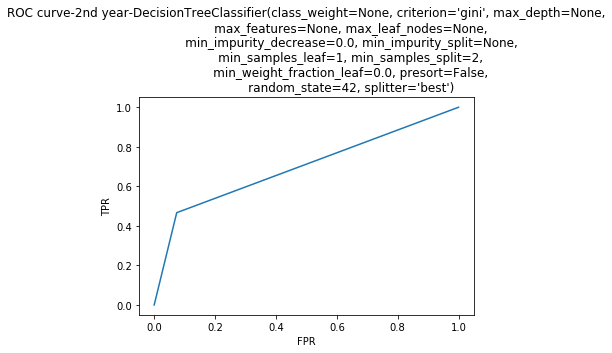

C:\Developement\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Developement\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


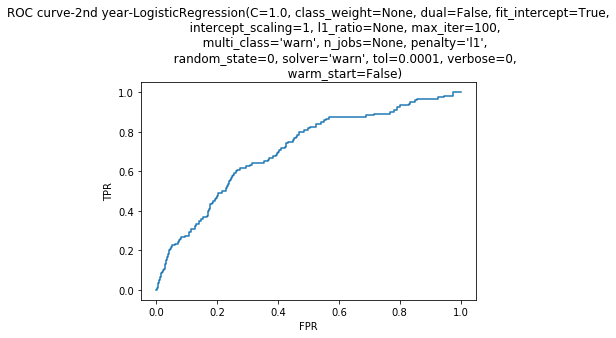

C:\Developement\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


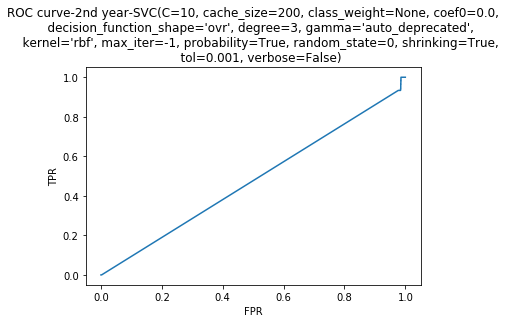

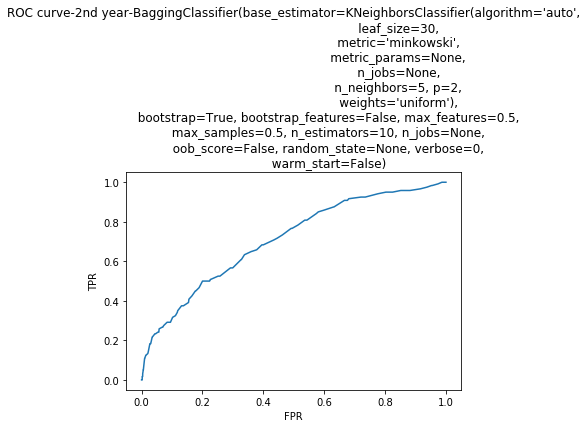

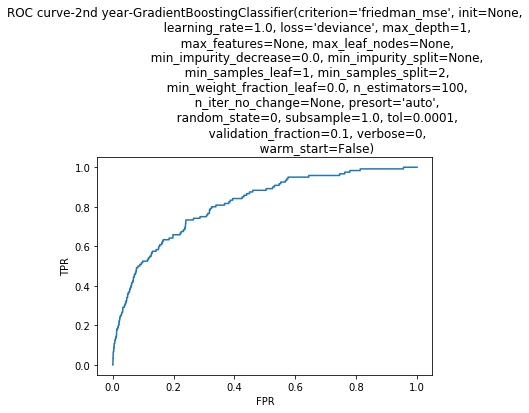

,Year,F1,Accuracy,Recalls,Precision_score,MAE,MSE,RMSE
RandomForestClassifier,2nd year,0.944889,0.942988,0.350000,0.304348,0.057012,0.057012,0.238771
DecisionTreeClassifier,2nd year,0.924618,0.907929,0.466667,0.205128,0.092071,0.092071,0.303432
LogisticRegression,2nd year,0.759366,0.655308,0.641667,0.070902,0.344692,0.344692,0.587105
SVM,2nd year,0.940761,0.959371,0.000000,0.000000,0.040629,0.040629,0.201567
BalancedBaggingClassifier,2nd year,0.884162,0.843709,0.375000,0.100671,0.156291,0.156291,0.395337
GradientBoostingClassifier,2nd year,0.923309,0.905636,0.475000,0.202128,0.094364,0.094364,0.307188


In [52]:
perform_modelling(models, mean_imputed_df1, "2nd year")

# Year 3

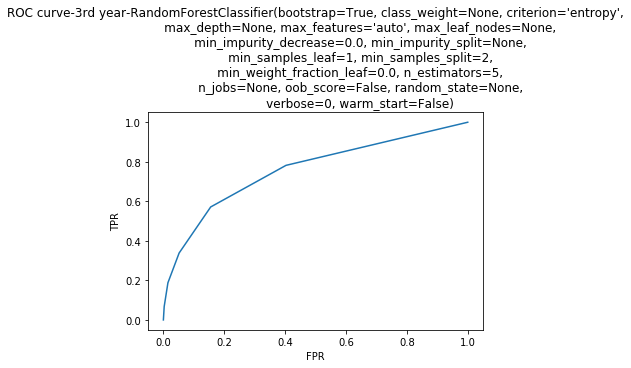

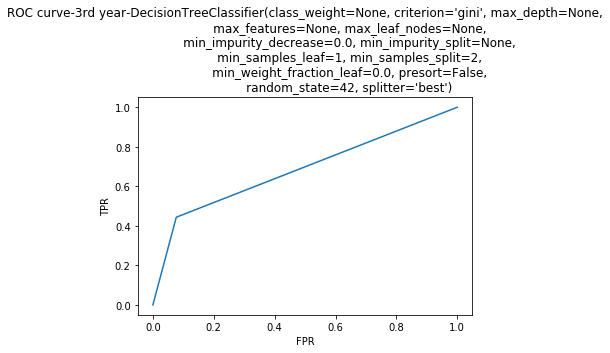

C:\Developement\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


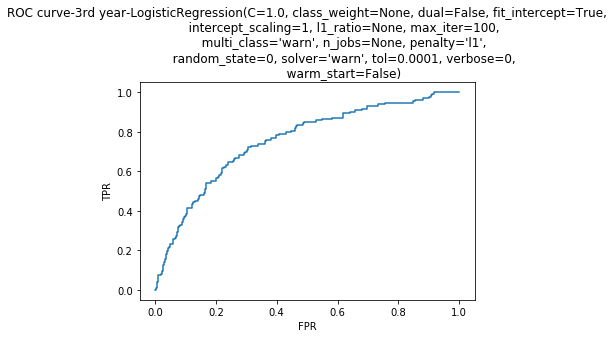

C:\Developement\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


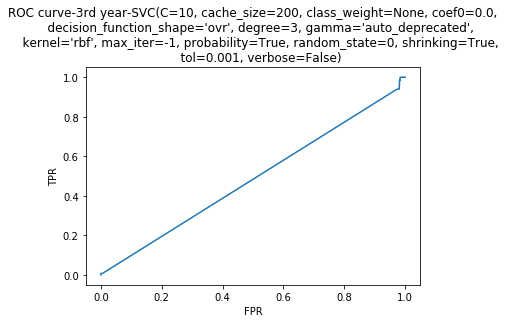

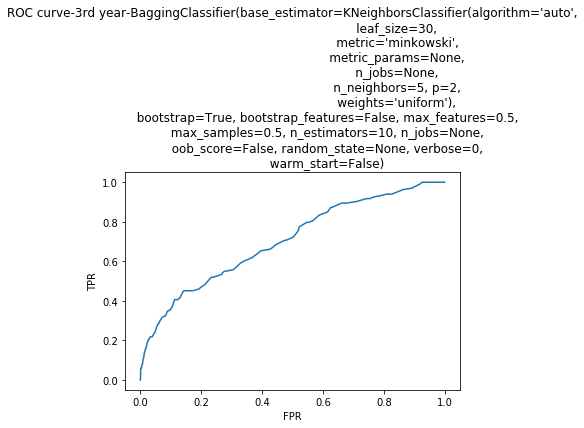

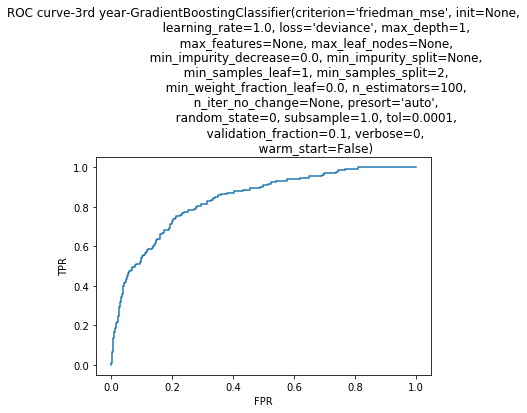

,Year,F1,Accuracy,Recalls,Precision_score,MAE,MSE,RMSE
RandomForestClassifier,3rd year,0.930006,0.922564,0.338346,0.223881,0.077436,0.077436,0.278273
DecisionTreeClassifier,3rd year,0.919677,0.902888,0.443609,0.202749,0.097112,0.097112,0.311628
LogisticRegression,3rd year,0.759644,0.658838,0.736842,0.086116,0.341162,0.341162,0.584090
SVM,3rd year,0.936291,0.954935,0.007519,0.090909,0.045065,0.045065,0.212285
BalancedBaggingClassifier,3rd year,0.877939,0.835290,0.451128,0.118577,0.164710,0.164710,0.405844
GradientBoostingClassifier,3rd year,0.914553,0.893050,0.511278,0.200000,0.106950,0.106950,0.327032


In [53]:
perform_modelling(models, mean_imputed_df2, "3rd year")

# Year 4

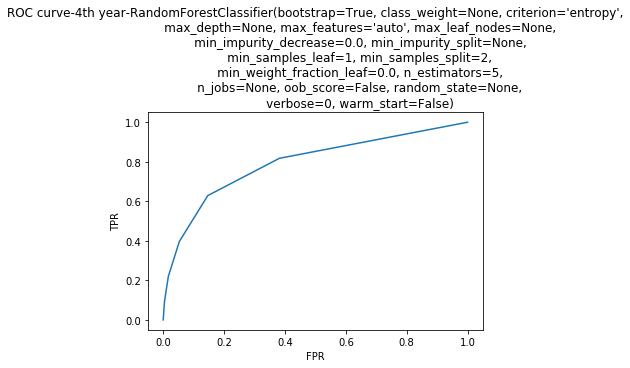

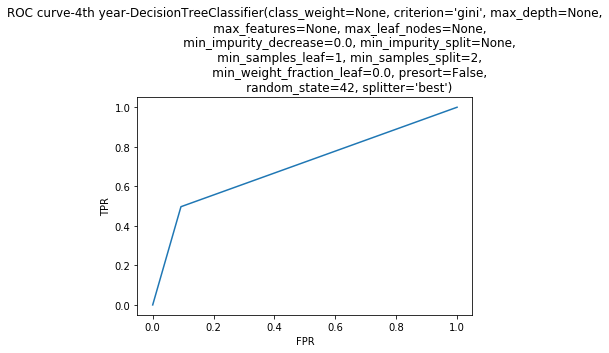

C:\Developement\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Developement\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


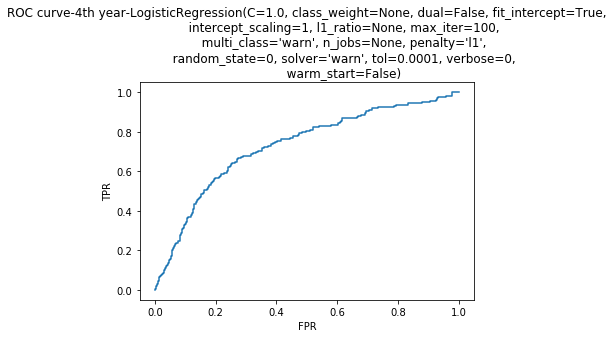

C:\Developement\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


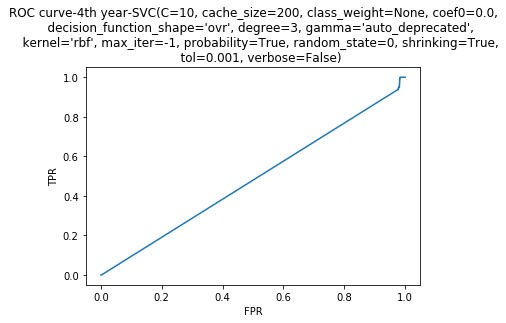

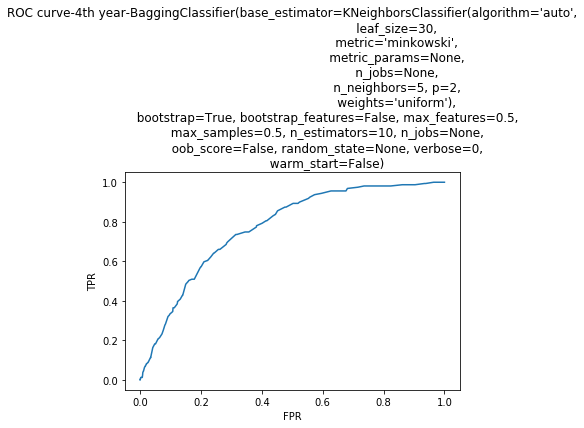

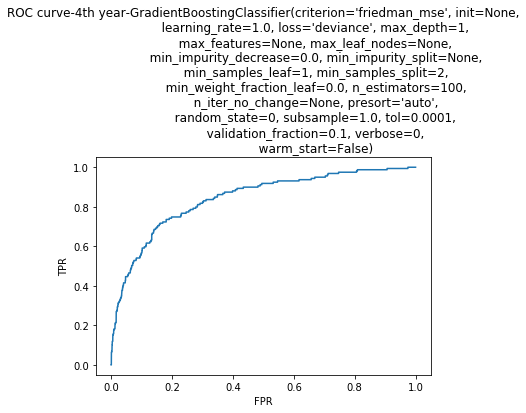

,Year,F1,Accuracy,Recalls,Precision_score,MAE,MSE,RMSE
RandomForestClassifier,4th year,0.922623,0.917291,0.396226,0.300000,0.082709,0.082709,0.287592
DecisionTreeClassifier,4th year,0.903696,0.884956,0.496855,0.234421,0.115044,0.115044,0.339182
LogisticRegression,4th year,0.817112,0.750511,0.610063,0.126302,0.249489,0.249489,0.499489
SVM,4th year,0.919064,0.944860,0.000000,0.000000,0.055140,0.055140,0.234818
BalancedBaggingClassifier,4th year,0.852458,0.804969,0.515723,0.141869,0.195031,0.195031,0.441623
GradientBoostingClassifier,4th year,0.904341,0.884275,0.553459,0.246499,0.115725,0.115725,0.340184


In [54]:
perform_modelling(models, mean_imputed_df3, "4th year")

# Year 5

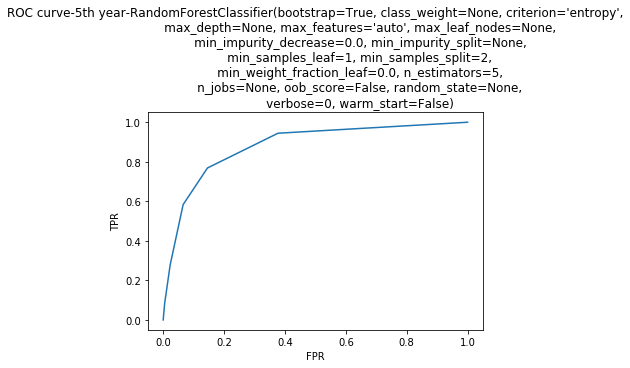

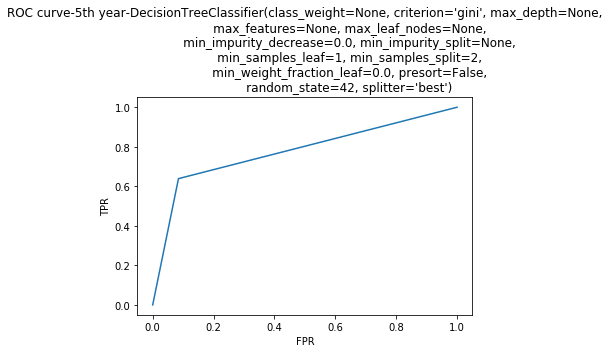

C:\Developement\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Developement\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


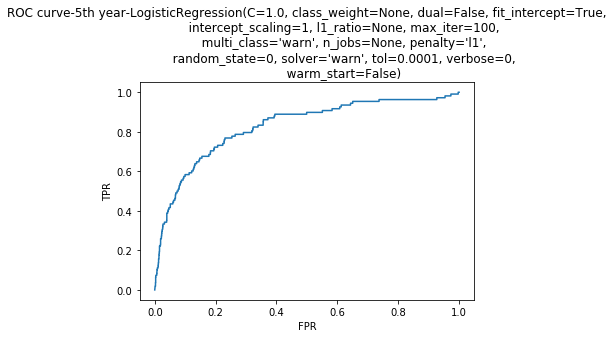

C:\Developement\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


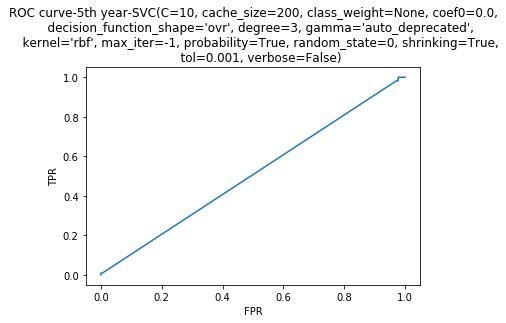

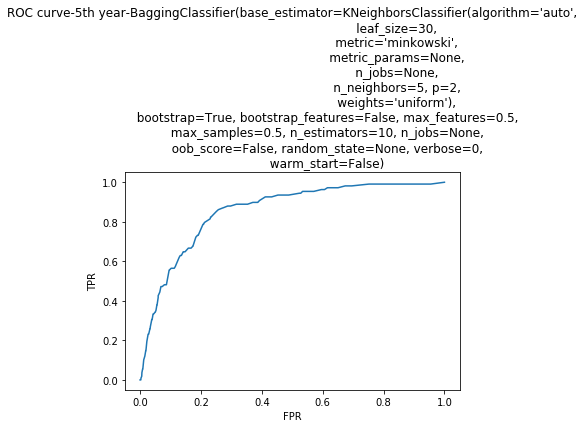

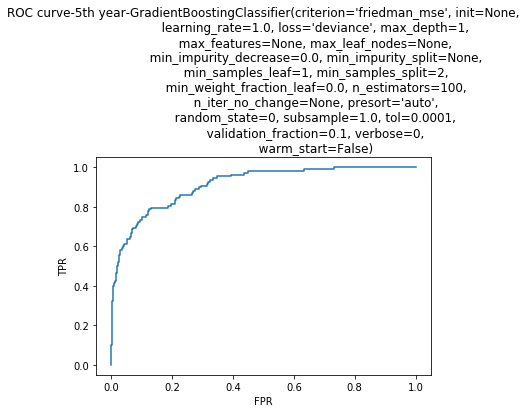

,Year,F1,Accuracy,Recalls,Precision_score,MAE,MSE,RMSE
RandomForestClassifier,5th year,0.922217,0.913142,0.583333,0.366279,0.086858,0.086858,0.294718
DecisionTreeClassifier,5th year,0.913155,0.898477,0.638889,0.328571,0.101523,0.101523,0.318626
LogisticRegression,5th year,0.875790,0.842640,0.657407,0.226837,0.157360,0.157360,0.396687
SVM,5th year,0.909509,0.936830,0.009259,0.166667,0.063170,0.063170,0.251336
BalancedBaggingClassifier,5th year,0.879867,0.849408,0.629630,0.230508,0.150592,0.150592,0.388062
GradientBoostingClassifier,5th year,0.923956,0.912578,0.685185,0.379487,0.087422,0.087422,0.295673


In [55]:
perform_modelling(models, mean_imputed_df4, "5th year")